### Decision Tree Regression (회귀 트리)
- 결정 트리와 결정 트리 기반의 앙상블 알고리즘은 분류뿐만 아니라 회귀도 가능하다.
- 분류와 유사하게 분할을 하며, 최종 분할 후 각 분할 영역에서 실제 데이터까지의 거리들의 평균 값으로 학습 및 예측을 수행한다.
<img src="./images/decision_tree_regression01.png" width="600" style="margin: 10px; margin-left: 0">
- 회귀 트리 역시 복잡한 트리 구조를 가질 경우 과적합이 위험이 있고, 트리의 크기와 노드의 개수의 제한 등으로 개선할 수 있다.
<img src="./images/decision_tree_regression02.png" width="600" style="margin:20px; margin-left: 0">
- 독립 변수들과 종속 변수 사이의 관계가 상당히 비선형적일 경우 사용하는 것이 좋다.
<img src="./images/decision_tree_regression03.png" width="800" style="margin:20px; margin-left: 0">
- 🚩 하지만, 다른 회귀 모델보다 전체적인 성능은 떨어진다.

##### 한우 가격 예측

In [138]:
import chardet

rawdata = open('./datasets/korea_cow.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
charenc

'EUC-KR'

In [139]:
import pandas as pd

cow_df = pd.read_csv('./datasets/korea_cow.csv', encoding='euc-kr')
cow_df

,일자,번호,출하주,개체번호,성별,kpn,계대,중량,최저가,낙찰가,상태,비고,종류,지역
0,2021.07.23,4,서*호,48928970,암,550.0,3.0,580,360,363,낙찰,목.배밑혹,큰소,경상남도고성
1,2021.07.23,5,이*락,102112702,암,744.0,2.0,460,320,353,낙찰,NaN,큰소,경상남도고성
2,2021.07.23,7,문*종,156144852,암,1263.0,4.0,340,400,471,낙찰,목이모색 상처,큰소,경상남도고성
3,2021.07.23,8,문*종,136983661,암,1159.0,2.0,380,400,432,낙찰,뒷다리약간절음,큰소,경상남도고성
4,2021.07.23,9,이*만,138655532,암,1124.0,6.0,550,650,766,낙찰,NaN,큰소,경상남도고성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19976,2021.06.22,320,윤*식,157190517,암,0.0,1.0,0,390,0,유찰,NaN,혈통우,전라남도 함평
19977,2021.06.22,321,윤*식,154652064,암,0.0,1.0,0,430,0,유찰,NaN,혈통우,전라남도 함평
19978,2021.06.22,322,윤*식,156278395,암,0.0,1.0,0,450,0,유찰,NaN,혈통우,전라남도 함평
19979,2021.06.22,323,윤*식,155232402,암,0.0,1.0,0,460,530,낙찰,정영기 -> 박손엽,혈통우,전라남도 함평


In [140]:
cow_df.isna().sum()

일자          0
번호          0
출하주        34
개체번호        0
성별          1
kpn        10
계대         10
중량          0
최저가         0
낙찰가         0
상태          0
비고      12319
종류          0
지역          0
dtype: int64

In [141]:
cow_df = cow_df.drop(columns=['개체번호', '출하주', 'kpn', '비고', '최저가', '일자', '번호', '지역'])
cow_df.isna().sum()

성별      1
계대     10
중량      0
낙찰가     0
상태      0
종류      0
dtype: int64

In [142]:
cow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19981 entries, 0 to 19980
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      19980 non-null  object 
 1   계대      19971 non-null  float64
 2   중량      19981 non-null  int64  
 3   낙찰가     19981 non-null  int64  
 4   상태      19981 non-null  object 
 5   종류      19981 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 936.7+ KB


In [143]:
cow_df.종류.value_counts()

종류
혈통우    14396
큰소      5585
Name: count, dtype: int64

In [144]:
cow_df.상태.value_counts()

상태
낙찰    17343
대기     1621
유찰     1016
보류        1
Name: count, dtype: int64

In [145]:
cow_df = cow_df[cow_df.상태 == '낙찰']
cow_df

,성별,계대,중량,낙찰가,상태,종류
0,암,3.0,580,363,낙찰,큰소
1,암,2.0,460,353,낙찰,큰소
2,암,4.0,340,471,낙찰,큰소
3,암,2.0,380,432,낙찰,큰소
4,암,6.0,550,766,낙찰,큰소
...,...,...,...,...,...,...
19973,암,1.0,0,460,낙찰,혈통우
19974,암,1.0,0,451,낙찰,혈통우
19975,암,1.0,0,480,낙찰,혈통우
19979,암,1.0,0,530,낙찰,혈통우


In [146]:
cow_df = cow_df.drop(columns='상태', axis=1)

In [147]:
cow_df

,성별,계대,중량,낙찰가,종류
0,암,3.0,580,363,큰소
1,암,2.0,460,353,큰소
2,암,4.0,340,471,큰소
3,암,2.0,380,432,큰소
4,암,6.0,550,766,큰소
...,...,...,...,...,...
19973,암,1.0,0,460,혈통우
19974,암,1.0,0,451,혈통우
19975,암,1.0,0,480,혈통우
19979,암,1.0,0,530,혈통우


In [148]:
cow_df.describe().T

,count,mean,std,min,25%,50%,75%,max
계대,17335.0,3.347851,2.053126,0.0,2.0,3.0,5.0,15.0
중량,17343.0,125.825982,181.441778,0.0,0.0,0.0,250.0,850.0
낙찰가,17343.0,483.724673,115.803914,55.0,409.0,471.0,539.0,1229.0


array([[<Axes: title={'center': '계대'}>, <Axes: title={'center': '중량'}>],
       [<Axes: title={'center': '낙찰가'}>, <Axes: >]], dtype=object)

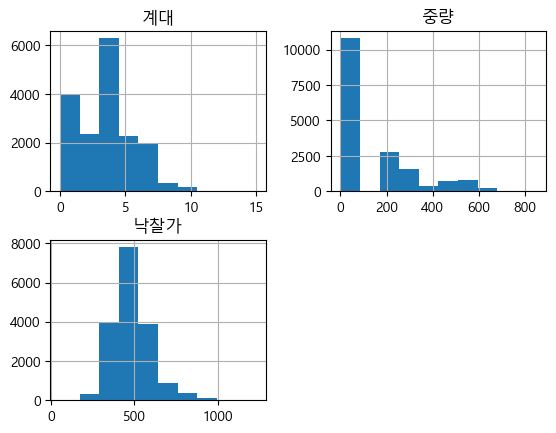

In [149]:
from matplotlib import font_manager

plt.rc('font', family='Malgun Gothic')
cow_df.hist()

<Axes: >

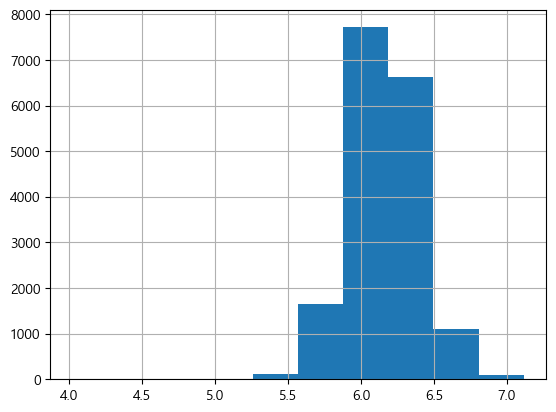

In [150]:
from matplotlib import font_manager
import numpy as np

plt.rc('font', family='Malgun Gothic')
np.log1p(cow_df.낙찰가).hist()

In [151]:
cow_df['가격'] = cow_df.낙찰가

In [152]:
cow_df = cow_df.drop(columns='낙찰가', axis=1)

In [153]:
cow_df

,성별,계대,중량,종류,가격
0,암,3.0,580,큰소,363
1,암,2.0,460,큰소,353
2,암,4.0,340,큰소,471
3,암,2.0,380,큰소,432
4,암,6.0,550,큰소,766
...,...,...,...,...,...
19973,암,1.0,0,혈통우,460
19974,암,1.0,0,혈통우,451
19975,암,1.0,0,혈통우,480
19979,암,1.0,0,혈통우,530


In [154]:
cow_df.성별.value_counts()

성별
수     9789
암     7426
거세     117
프       10
Name: count, dtype: int64

In [155]:
cond1 = cow_df.성별 == '수' 
cond2 = cow_df.성별 == '암'
cond = cond1 | cond2
cow_df = cow_df[cond]
cow_df.성별.value_counts()

성별
수    9789
암    7426
Name: count, dtype: int64

In [156]:
cow_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17215 entries, 0 to 19980
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      17215 non-null  object 
 1   계대      17208 non-null  float64
 2   중량      17215 non-null  int64  
 3   종류      17215 non-null  object 
 4   가격      17215 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 807.0+ KB


In [157]:
from sklearn.preprocessing import LabelEncoder

encoders = []
for column in cow_df[['성별', '종류']]:
    encoder = LabelEncoder()
    cow_df.loc[:, column] = encoder.fit_transform(cow_df[column])
    encoders.append(encoder)
    print(encoder.classes_)

['수' '암']
['큰소' '혈통우']


In [158]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_cow_df = pd.DataFrame(scale.fit_transform(cow_df.iloc[:, :-1]), columns=cow_df.iloc[:, :-1].columns)

In [159]:
scaled_cow_df

,성별,계대,중량,종류
0,1.148132,-0.167578,2.494562,-1.625849
1,1.148132,-0.654769,1.834296,-1.625849
2,1.148132,0.319613,1.174029,-1.625849
3,1.148132,-0.654769,1.394118,-1.625849
4,1.148132,1.293994,2.329496,-1.625849
...,...,...,...,...
17210,1.148132,-1.141959,-0.696726,0.615063
17211,1.148132,-1.141959,-0.696726,0.615063
17212,1.148132,-1.141959,-0.696726,0.615063
17213,1.148132,-1.141959,-0.696726,0.615063


array([[<Axes: title={'center': '성별'}>, <Axes: title={'center': '계대'}>],
       [<Axes: title={'center': '중량'}>, <Axes: title={'center': '종류'}>]],
      dtype=object)

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


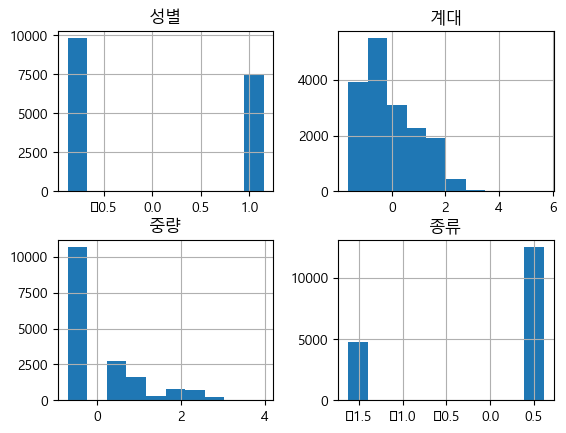

In [160]:
from matplotlib import font_manager

plt.rc('font', family='Malgun Gothic')
scaled_cow_df.hist()

In [161]:
scaled_cow_df = scaled_cow_df[scaled_cow_df.중량.between(-1.96, 1.96)]
scaled_cow_df = scaled_cow_df[scaled_cow_df.계대.between(-1.96, 1.96)]

array([[<Axes: title={'center': '성별'}>, <Axes: title={'center': '계대'}>],
       [<Axes: title={'center': '중량'}>, <Axes: title={'center': '종류'}>]],
      dtype=object)

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


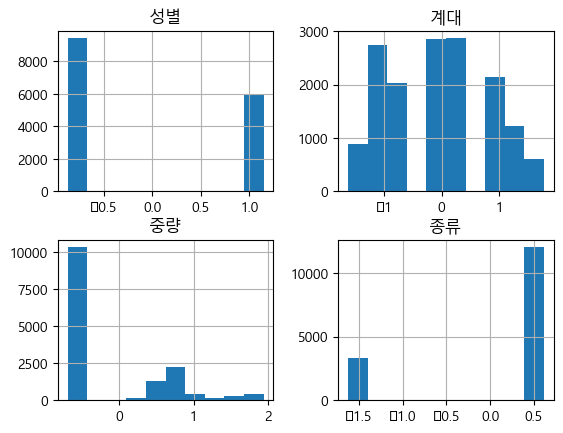

In [162]:
from matplotlib import font_manager

plt.rc('font', family='Malgun Gothic')
scaled_cow_df.hist()

In [165]:
cow_df = cow_df.iloc[scaled_cow_df.index, :]
cow_df

,성별,계대,중량,종류,가격
1,1,2.0,460,0,353
2,1,4.0,340,0,471
3,1,2.0,380,0,432
6,1,4.0,290,0,353
13,1,4.0,430,0,555
...,...,...,...,...,...
19973,1,1.0,0,1,460
19974,1,1.0,0,1,451
19975,1,1.0,0,1,480
19979,1,1.0,0,1,530


In [166]:
cow_df = cow_df.reset_index(drop=True)
cow_df

,성별,계대,중량,종류,가격
0,1,2.0,460,0,353
1,1,4.0,340,0,471
2,1,2.0,380,0,432
3,1,4.0,290,0,353
4,1,4.0,430,0,555
...,...,...,...,...,...
15387,1,1.0,0,1,460
15388,1,1.0,0,1,451
15389,1,1.0,0,1,480
15390,1,1.0,0,1,530


In [167]:
scaled_cow_df = scaled_cow_df.reset_index(drop=True)
scaled_cow_df['가격'] = cow_df.가격
scaled_cow_df

,성별,계대,중량,종류,가격
0,1.148132,-0.654769,1.834296,-1.625849,353
1,1.148132,0.319613,1.174029,-1.625849,471
2,1.148132,-0.654769,1.394118,-1.625849,432
3,1.148132,0.319613,0.898918,-1.625849,353
4,1.148132,0.319613,1.669229,-1.625849,555
...,...,...,...,...,...
15387,1.148132,-1.141959,-0.696726,0.615063,460
15388,1.148132,-1.141959,-0.696726,0.615063,451
15389,1.148132,-1.141959,-0.696726,0.615063,480
15390,1.148132,-1.141959,-0.696726,0.615063,530


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'Correlation')

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


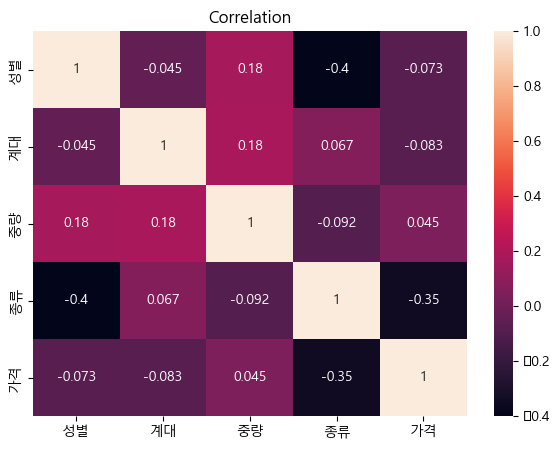

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = scaled_cow_df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, annot=True)
heatmap.set_title("Correlation")

In [169]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

def get_evaluation(y_test, prediction):
    MAE =  mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)

    print('MAE: {:.4f}, MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'.format(MAE, MSE, RMSE, MSLE, RMSLE, R2))

In [170]:
scaled_cow_df.가격.isna().sum()

0

In [171]:
cow_df = cow_df[~cow_df.계대.isna()]
cow_df

,성별,계대,중량,종류,가격
0,1,2.0,460,0,353
1,1,4.0,340,0,471
2,1,2.0,380,0,432
3,1,4.0,290,0,353
4,1,4.0,430,0,555
...,...,...,...,...,...
15387,1,1.0,0,1,460
15388,1,1.0,0,1,451
15389,1,1.0,0,1,480
15390,1,1.0,0,1,530


In [173]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = cow_df.drop(columns='가격', axis=1), cow_df.가격

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(poly_features, targets, test_size=0.3, random_state=124)

In [175]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np

dt_reg = DecisionTreeRegressor(random_state=124, max_depth=4)
rf_reg = RandomForestRegressor(random_state=124, n_estimators=1000, max_depth=8)
gb_reg = GradientBoostingRegressor(random_state=124, n_estimators=1000, max_depth=8)
xgb_reg = XGBRegressor(n_estimators=1000, max_depth=8)
lgb_reg = LGBMRegressor(n_estimators=1000, max_depth=8)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    model.fit(X_train, np.log1p(y_train))
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(np.log1p(y_test), prediction)

DecisionTreeRegressor
MAE: 0.1294, MSE: 0.0316, RMSE: 0.1778, MSLE: 0.0006, RMSLE: 0.0251, R2: 0.3433
RandomForestRegressor
MAE: 0.1251, MSE: 0.0300, RMSE: 0.1732, MSLE: 0.0006, RMSLE: 0.0244, R2: 0.3770
GradientBoostingRegressor
MAE: 0.1277, MSE: 0.0322, RMSE: 0.1795, MSLE: 0.0006, RMSLE: 0.0253, R2: 0.3312
XGBRegressor
MAE: 0.1277, MSE: 0.0320, RMSE: 0.1789, MSLE: 0.0006, RMSLE: 0.0252, R2: 0.3357
LGBMRegressor
MAE: 0.1271, MSE: 0.0312, RMSE: 0.1768, MSLE: 0.0006, RMSLE: 0.0249, R2: 0.3512
